In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
%matplotlib inline

In [3]:
from matplotlib.pyplot import subplots

In [4]:
# Loading the dataset
df = pd.read_csv('coded_santa_clara_crime_data.csv')
print(df.info())
df[:2]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194865 entries, 0 to 194864
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   incident_id            194865 non-null  int64  
 1   case_number            194865 non-null  object 
 2   incident_month         194865 non-null  int64  
 3   incident_day           194865 non-null  int64  
 4   incident_year          194865 non-null  int64  
 5   incident_hour          194865 non-null  object 
 6   incident_type_primary  194865 non-null  object 
 7   incident_description   194865 non-null  object 
 8   clearance_type         0 non-null       float64
 9   address_1              194864 non-null  object 
 10  address_2              0 non-null       float64
 11  city                   194865 non-null  object 
 12  state                  194865 non-null  object 
 13  zip                    149 non-null     float64
 14  country                0 non-null   

incident_id case_number  incident_month  incident_day  incident_year  \
0    834531738  S180490316               2            18           2018   
1    834531737  S180490317               2            18           2018   

  incident_hour  incident_type_primary  \
0       9:19:00        PEDESTRIAN STOP   
1       9:24:00  UNKNOWN TYPE 911 CALL   

                                incident_description  clearance_type  \
0  Call Type: 1095   <br>Description: PEDESTRIAN ...             NaN   
1  Call Type: 911UNK <br>Description: UNKNOWN TYP...             NaN   

                  address_1  ...  country   latitude   longitude  \
0     SARATOGA SUNNYVALE RD  ...      NaN  37.279442 -122.031355   
1  100 Block BLOCK S 1ST ST  ...      NaN  37.335714 -121.889062   

     created_at    updated_at                                        location  \
0  2/19/18 6:05  2/26/18 2:31  POINT (-122.03135506612081 37.279442038259376)   
1  2/19/18 6:05  2/26/18 2:31   POINT (-121.88906235618761 37.33571374139603)   

   hour_of_day day_of_week parent_incident_type incident_code  
0           21      Sunday      Pedestrian Stop            PS  
1           21      Sunday                Alarm            A1  

[2 rows x 24 columns]

In [5]:
df[:2]

incident_id case_number  incident_month  incident_day  incident_year  \
0    834531738  S180490316               2            18           2018   
1    834531737  S180490317               2            18           2018   

  incident_hour  incident_type_primary  \
0       9:19:00        PEDESTRIAN STOP   
1       9:24:00  UNKNOWN TYPE 911 CALL   

                                incident_description  clearance_type  \
0  Call Type: 1095   <br>Description: PEDESTRIAN ...             NaN   
1  Call Type: 911UNK <br>Description: UNKNOWN TYP...             NaN   

                  address_1  ...  country   latitude   longitude  \
0     SARATOGA SUNNYVALE RD  ...      NaN  37.279442 -122.031355   
1  100 Block BLOCK S 1ST ST  ...      NaN  37.335714 -121.889062   

     created_at    updated_at                                        location  \
0  2/19/18 6:05  2/26/18 2:31  POINT (-122.03135506612081 37.279442038259376)   
1  2/19/18 6:05  2/26/18 2:31   POINT (-121.88906235618761 37.33571374139603)   

   hour_of_day day_of_week parent_incident_type incident_code  
0           21      Sunday      Pedestrian Stop            PS  
1           21      Sunday                Alarm            A1  

[2 rows x 24 columns]

In [6]:
df_city=pd.crosstab(df['state'], df['city'])
df_city

city   SANTA CLARA COUNTY
state                    
CA                 194865

In [7]:
# Visually inspect the data
print(df.head(3))

   incident_id case_number  incident_month  incident_day  incident_year  \
0    834531738  S180490316               2            18           2018   
1    834531737  S180490317               2            18           2018   
2    834531736  S180490320               2            18           2018   

  incident_hour  incident_type_primary  \
0       9:19:00        PEDESTRIAN STOP   
1       9:24:00  UNKNOWN TYPE 911 CALL   
2       9:31:00           VEHICLE STOP   

                                incident_description  clearance_type  \
0  Call Type: 1095   <br>Description: PEDESTRIAN ...             NaN   
1  Call Type: 911UNK <br>Description: UNKNOWN TYP...             NaN   
2  Call Type: 1195   <br>Description: VEHICLE STO...             NaN   

                  address_1  ...  country   latitude   longitude  \
0     SARATOGA SUNNYVALE RD  ...      NaN  37.279442 -122.031355   
1  100 Block BLOCK S 1ST ST  ...      NaN  37.335714 -121.889062   
2                    NEW AV  ...     

In [8]:
# Check for missing values and summarize data
print(df.isnull().sum())
print(df.describe())

incident_id                   0
case_number                   0
incident_month                0
incident_day                  0
incident_year                 0
incident_hour                 0
incident_type_primary         0
incident_description          0
clearance_type           194865
address_1                     1
address_2                194865
city                          0
state                         0
zip                      194716
country                  194865
latitude                      0
longitude                     0
created_at                    0
updated_at                    0
location                      0
hour_of_day                   0
day_of_week                   0
parent_incident_type          0
incident_code                 0
dtype: int64
        incident_id  incident_month   incident_day  incident_year  \
count  1.948650e+05   194865.000000  194865.000000  194865.000000   
mean   8.823932e+08        6.946932      15.462397    2018.233367   
std    3.989

In [9]:
df_tab=pd.crosstab(df['parent_incident_type'], df['incident_type_primary'])
df_tab

incident_type_primary       ABANDONED OR FOUND BICYCLE  ABANDONED VEHICLE  \
parent_incident_type                                                        
Alarm                                                0                  0   
Arson                                                0                  0   
Assault                                              0                  0   
Assault with Deadly Weapon                           0                  0   
Breaking & Entering                                  0                  0   
Community Policing                                   0               5480   
Death                                                0                  0   
Disorder                                             0                  0   
Drugs                                                0                  0   
Family Offense                                       0                  0   
Fire                                                 0                  0   
Kidnapping                                           0                  0   
Liquor                                               0                  0   
Missing Person                                       0                  0   
Other                                                0                  0   
Other Sexual Offense                                 0                  0   
Pedestrian Stop                                      0                  0   
Property Crime                                     122                  0   
Robbery                                              0                  0   
Sexual Assault                                       0                  0   
Theft                                                0                  0   
Theft from Vehicle                                   0                  0   
Theft of Vehicle                                     0                  0   
Traffic                                              0                  0   
Vehicle Recovery                                     0                  0   
Vehicle Stop                                         0                  0   
Weapons Offense                                      0                  0   

incident_type_primary       ABANDONED VEHICLE, BLOCKING DRIVEWAY  \
parent_incident_type                                               
Alarm                                                          0   
Arson                                                          0   
Assault                                                        0   
Assault with Deadly Weapon                                     0   
Breaking & Entering                                            0   
Community Policing                                             0   
Death                                                          0   
Disorder                                                       0   
Drugs                                                          0   
Family Offense                                                 0   
Fire                                                           0   
Kidnapping                                                     0   
Liquor                                                         0   
Missing Person                                                 0   
Other                                                          0   
Other Sexual Offense                                           0   
Pedestrian Stop                                                0   
Property Crime                                                 0   
Robbery                                                        0   
Sexual Assault                                                 0   
Theft                                                          0   
Theft from Vehicle                                             0   
Theft of Vehicle                                               0   
Traffic                                                      532  

In [22]:
df_tab=pd.crosstab(df['parent_incident_type'], df['incident_code'])
df_tab

incident_code                  A1  A2    A3   A4     B      C   D1     D2  \
parent_incident_type                                                        
Alarm                       21563   0     0    0     0      0    0      0   
Arson                           0  16     0    0     0      0    0      0   
Assault                         0   0  2622    0     0      0    0      0   
Assault with Deadly Weapon      0   0     0  128     0      0    0      0   
Breaking & Entering             0   0     0    0  1657      0    0      0   
Community Policing              0   0     0    0     0  14635    0      0   
Death                           0   0     0    0     0      0  306      0   
Disorder                        0   0     0    0     0      0    0  20981   
Drugs                           0   0     0    0     0      0    0      0   
Family Offense                  0   0     0    0     0      0    0      0   
Fire                            0   0     0    0     0      0    0      0   
Kidnapping                      0   0     0    0     0      0    0      0   
Liquor                          0   0     0    0     0      0    0      0   
Missing Person                  0   0     0    0     0      0    0      0   
Other                           0   0     0    0     0      0    0      0   
Other Sexual Offense            0   0     0    0     0      0    0      0   
Pedestrian Stop                 0   0     0    0     0      0    0      0   
Property Crime                  0   0     0    0     0      0    0      0   
Robbery                         0   0     0    0     0      0    0      0   
Sexual Assault                  0   0     0    0     0      0    0      0   
Theft                           0   0     0    0     0      0    0      0   
Theft from Vehicle              0   0     0    0     0      0    0      0   
Theft of Vehicle                0   0     0    0     0      0    0      0   
Traffic                         0   0     0    0     0      0    0      0   
Vehicle Recovery                0   0     0    0     0      0    0      0   
Vehicle Stop                    0   0     0    0     0      0    0      0   
Weapons Offense                 0   0     0    0     0      0    0      0   

incident_code                D3   F1  ...     PS    R    S    T1    T2    T3  \
parent_incident_type                  ...                                      
Alarm                         0    0  ...      0    0    0     0     0     0   
Arson                         0    0  ...      0    0    0     0     0     0   
Assault                       0    0  ...      0    0    0     0     0     0   
Assault with Deadly Weapon    0    0  ...      0    0    0     0     0     0   
Breaking & Entering           0    0  ...      0    0    0     0     0     0   
Community Policing            0    0  ...      0    0    0     0     0     0   
Death                         0    0  ...      0    0    0     0     0     0   
Disorder                      0    0  ...      0    0    0     0     0     0   
Drugs                       770    0  ...      0    0    0     0     0     0   
Family Offense                0  333  ...      0    0    0     0     0     0   
Fire                          0    0  ...      0    0    0     0     0     0   
Kidnapping                    0    0  ...      0    0    0     0     0     0   
Liquor                        0    0  ...      0    0    0     0     0     0   
Missing Person                0    0  ...      0    0    0     0     0     0   
Other                         0    0  ...      0    0    0     0     0     0   
Other Sexual Offense          0    0  ...      0    0    0     0     0     0   
Pedestrian Stop               0    0  ...  18652    0    0     0     0     0   
Property Crime                0    0  ...      0    0    0     0     0     0   
Robbery                       0    0  ...      0  143    0     0     0     0   
Sexual Assault                0    0  ...      0    0  217     0     0     0   
Theft 

<Figure size 2000x1000 with 0 Axes>

Text(0.5, 1.0, 'Crime Incidents in Santa Clara County')

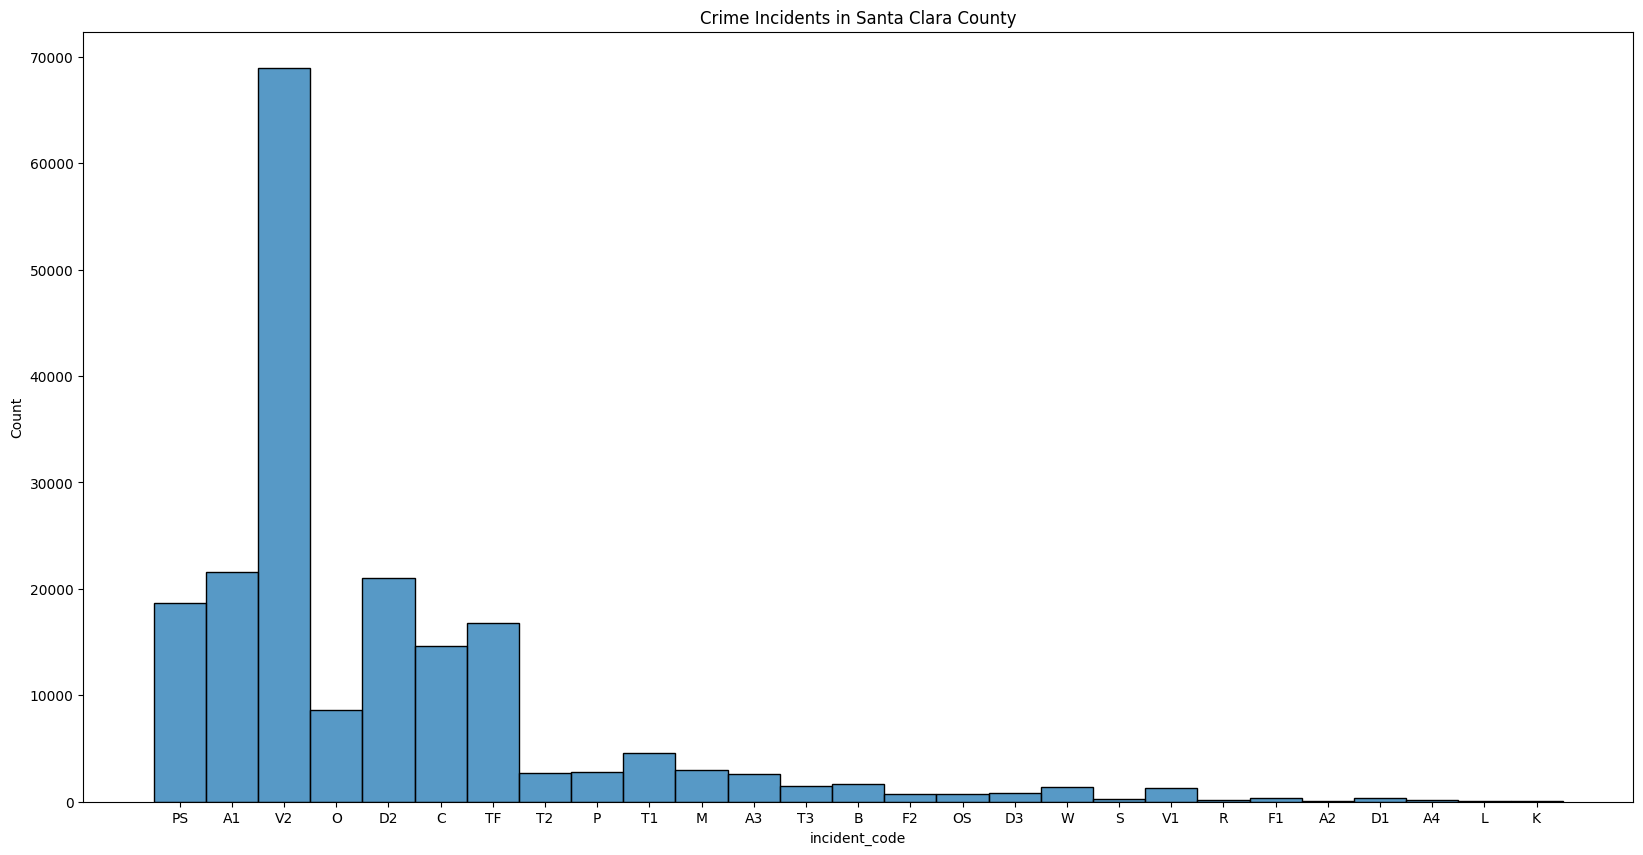

In [64]:
data=df['incident_code']
plt.figure(figsize=(20,10))
g=sns.histplot(data)
g.set_title('Crime Incidents in Santa Clara County')
plt.show()

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Crime Incidents in Santa Clara County')

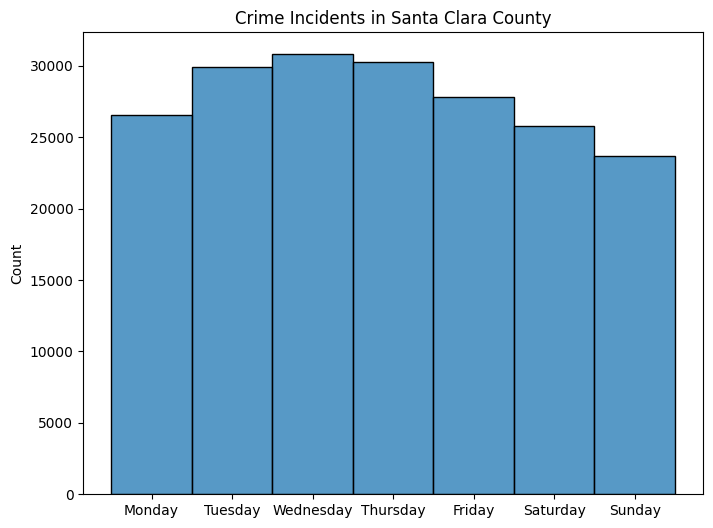

In [10]:
data=df['day_of_week']
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

data = pd.Categorical(data, categories=days_order, ordered=True)

plt.figure(figsize=(8,6))
g=sns.histplot(data)
g.set_title('Crime Incidents in Santa Clara County')
plt.show()

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Crime Incidents in Santa Clara County')

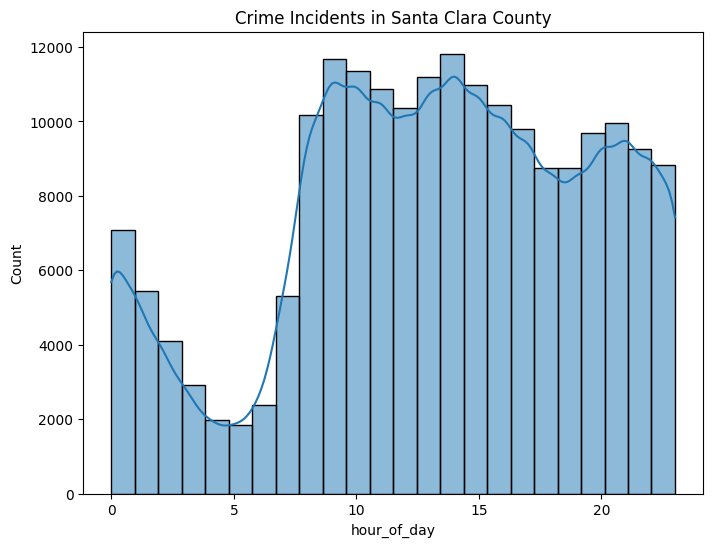

In [76]:
data=df['hour_of_day']
plt.figure(figsize=(8,6))
n_bins=24
g=sns.histplot(data,kde=True, bins=n_bins)
g.set_title('Crime Incidents in Santa Clara County')
plt.show()

In [12]:
df_v2=df[df['incident_code']=="V2"]
df_v2.shape

(68912, 24)

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Vehicle Stops in Santa Clara County')

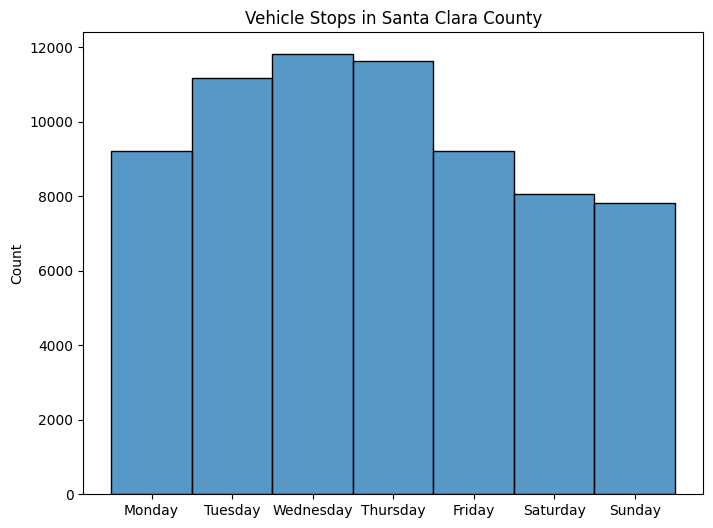

In [13]:
data=df_v2['day_of_week']
data = pd.Categorical(data, categories=days_order, ordered=True)
plt.figure(figsize=(8,6))
g=sns.histplot(data)
g.set_title('Vehicle Stops in Santa Clara County')
plt.show()

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Vehicle Stops in Santa Clara County')

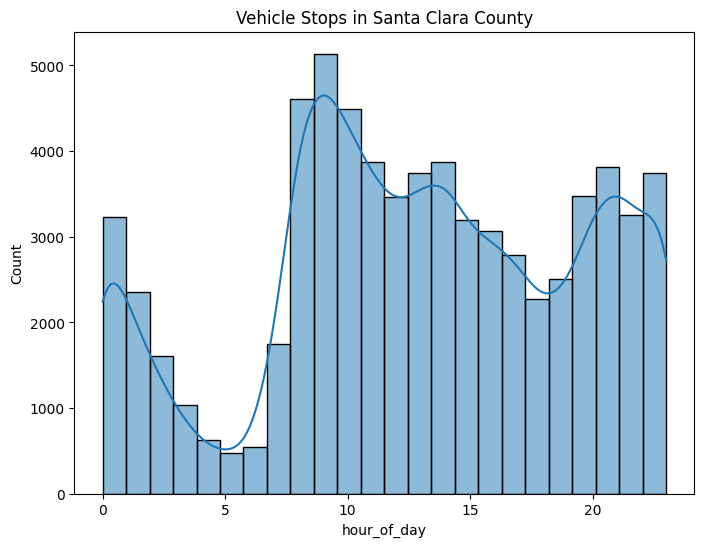

In [72]:
data=df_v2['hour_of_day']
n_bins = 24
plt.figure(figsize=(8,6))
g=sns.histplot(data,kde=True, bins=n_bins)
g.set_title('Vehicle Stops in Santa Clara County')
plt.show()

In [14]:
df_ps=df[df['incident_code']=="PS"]
df_ps.shape

(18652, 24)

<Figure size 2000x600 with 0 Axes>

Text(0.5, 1.0, 'Pedestrian Stops in Santa Clara County')

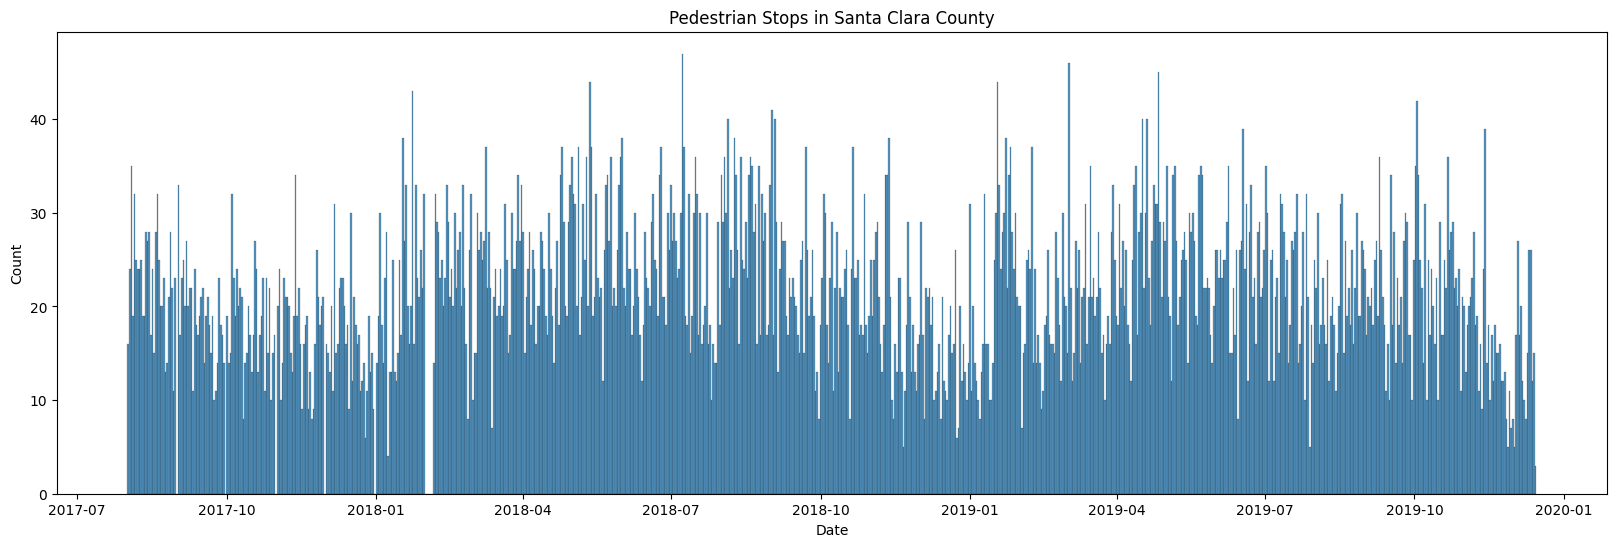

In [186]:
data=df_ps['Date']
plt.figure(figsize=(20,6))
g=sns.histplot(data, bins=867)
g.set_title('Pedestrian Stops in Santa Clara County')
plt.show()

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Pedestrian Stops in Santa Clara County')

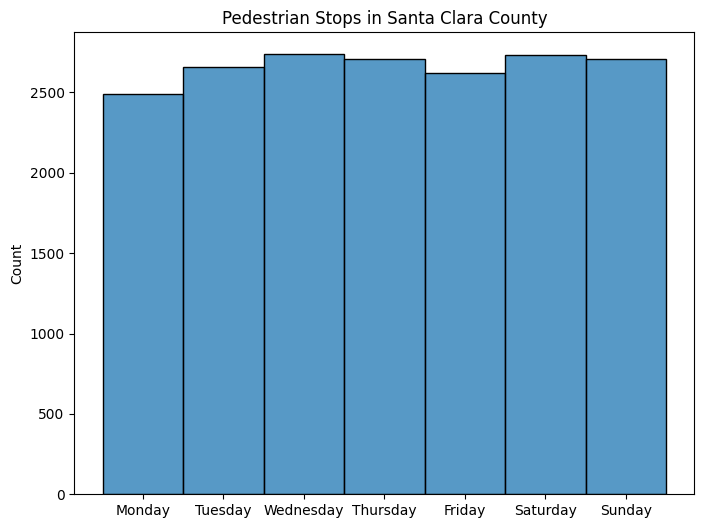

In [15]:
data=df_ps['day_of_week']
data = pd.Categorical(data, categories=days_order, ordered=True)
n_bins=7
plt.figure(figsize=(8,6))
g=sns.histplot(data, bins=n_bins)
g.set_title('Pedestrian Stops in Santa Clara County')
plt.show()

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Pedestrian Stops in Santa Clara County')

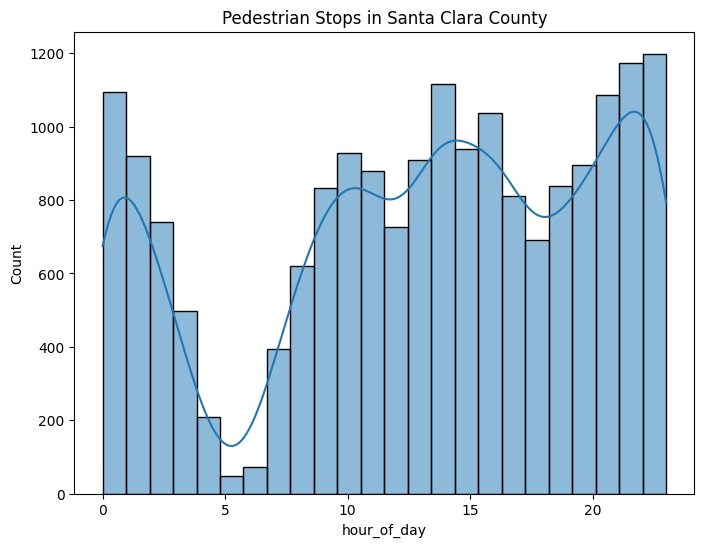

In [71]:
data=df_ps['hour_of_day']
n_bins = 24
plt.figure(figsize=(8,6))
g=sns.histplot(data,kde=True, bins=n_bins)
g.set_title('Pedestrian Stops in Santa Clara County')
plt.show()

In [16]:
df_c=df[df['incident_code']=="C"]
df_c.shape

(14635, 24)

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Community Policing in Santa Clara County')

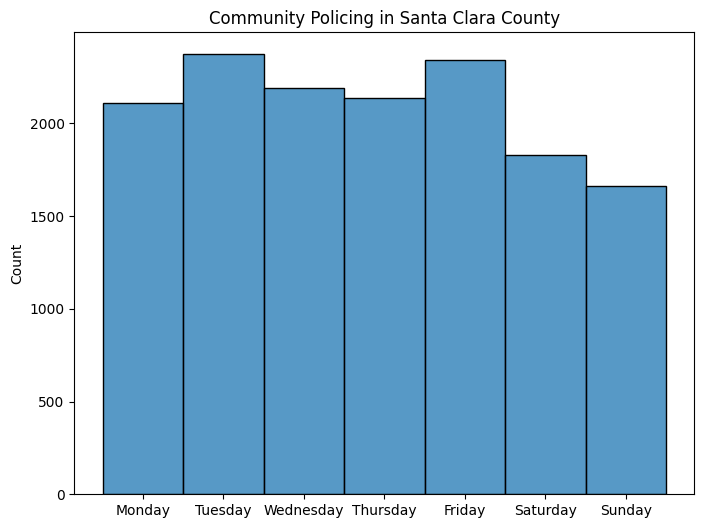

In [17]:
data=df_c['day_of_week']
data = pd.Categorical(data, categories=days_order, ordered=True)
plt.figure(figsize=(8,6))
g=sns.histplot(data)
g.set_title('Community Policing in Santa Clara County')
plt.show()

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Community Policing in Santa Clara County')

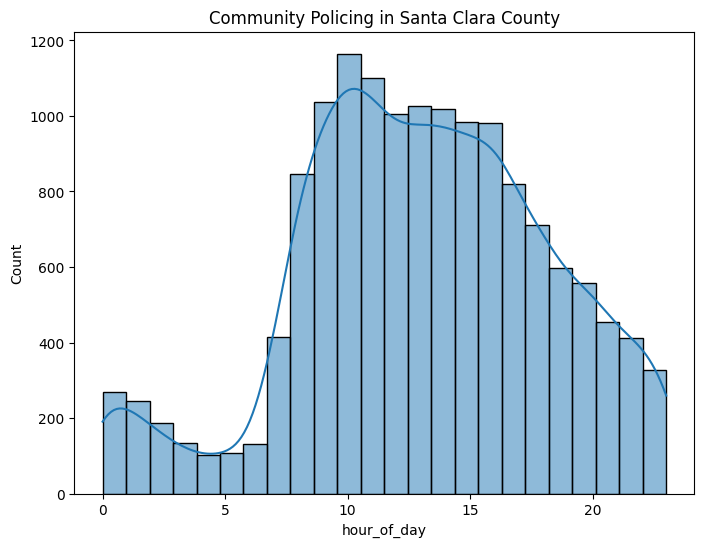

In [75]:
data=df_c['hour_of_day']
n_bins=24
plt.figure(figsize=(8,6))
g=sns.histplot(data,kde=True,bins=n_bins)
g.set_title('Community Policing in Santa Clara County')
plt.show()

In [18]:
df_al=df[df['incident_code']=="A1"]
df_al.shape

(21563, 24)

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Alarms in Santa Clara County')

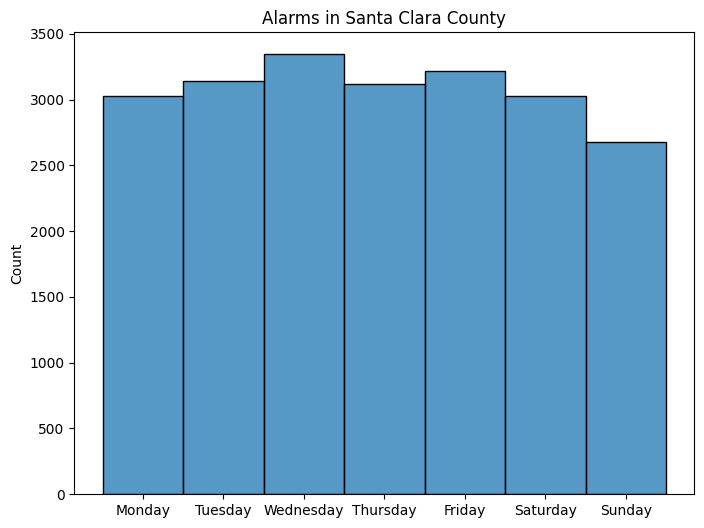

In [19]:
data=df_al['day_of_week']
data = pd.Categorical(data, categories=days_order, ordered=True)
plt.figure(figsize=(8,6))
g=sns.histplot(data)
g.set_title('Alarms in Santa Clara County')
plt.show()

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Alarms in Santa Clara County')

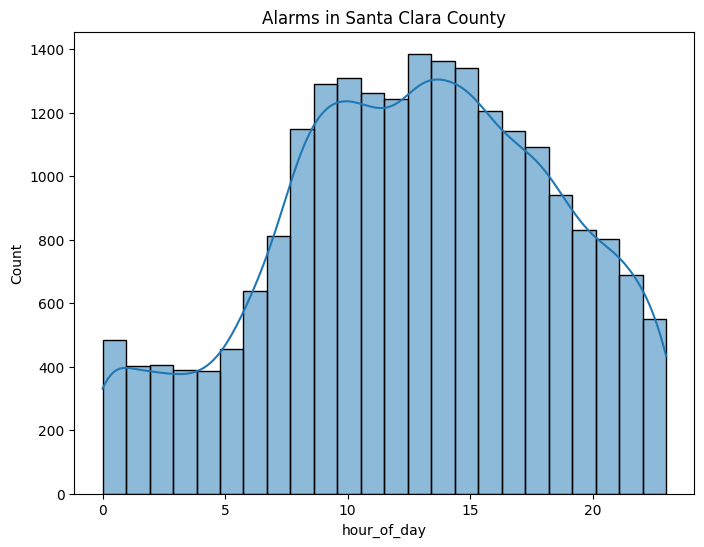

In [80]:
data=df_al['hour_of_day']
plt.figure(figsize=(8,6))
n_bins=24
g=sns.histplot(data,kde=True, bins=n_bins)
g.set_title('Alarms in Santa Clara County')
plt.show()

In [20]:
df_tf=df[df['incident_code']=="TF"]
df_al.shape

(21563, 24)

<Figure size 2000x600 with 0 Axes>

Text(0.5, 1.0, 'Traffic Crimes in Santa Clara County')

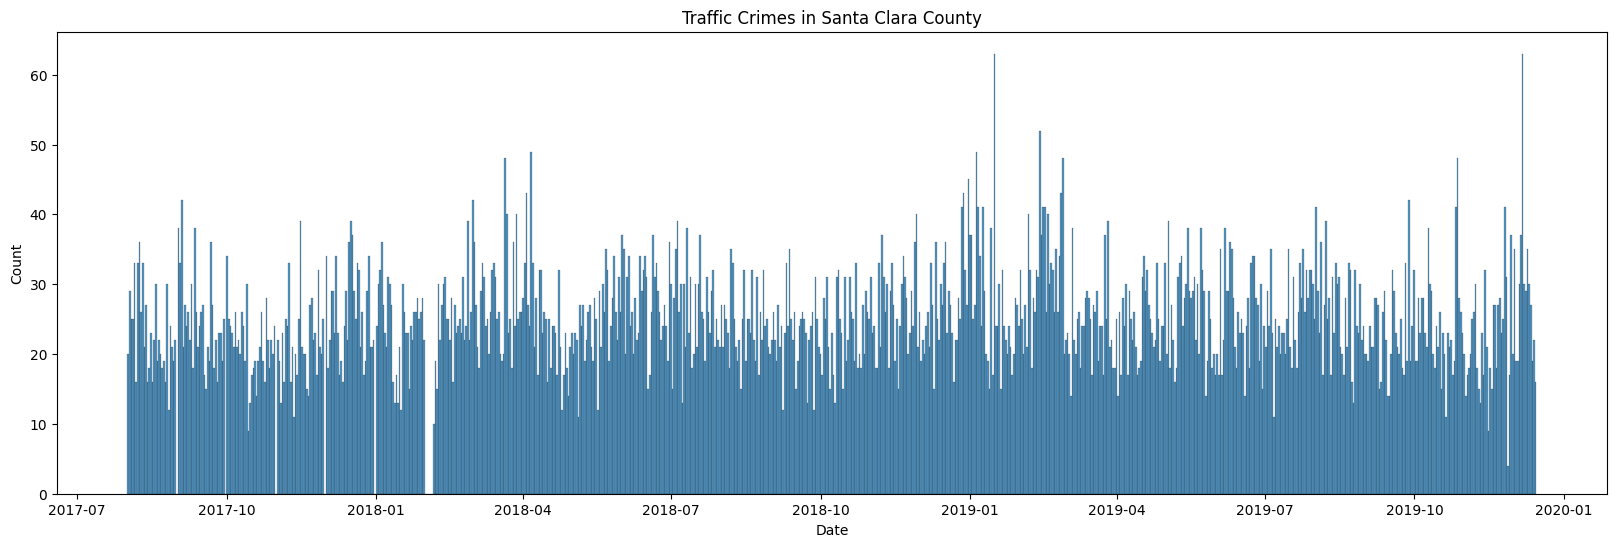

In [188]:
data=df_al['Date']
plt.figure(figsize=(20,6))
g=sns.histplot(data, bins=867)
g.set_title('Traffic Crimes in Santa Clara County')
plt.show()

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Trafic Crimes in Santa Clara County')

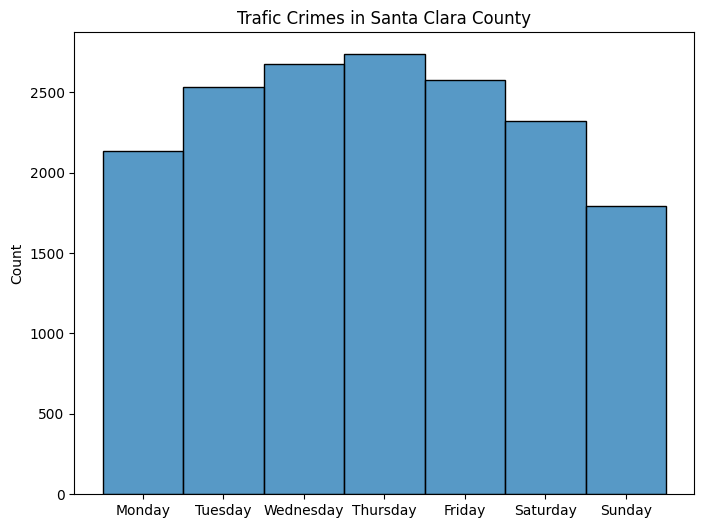

In [21]:
data=df_tf['day_of_week']
data = pd.Categorical(data, categories=days_order, ordered=True)
plt.figure(figsize=(8,6))
g=sns.histplot(data)
g.set_title('Trafic Crimes in Santa Clara County')
plt.show()

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Trafic Crimes in Santa Clara County')

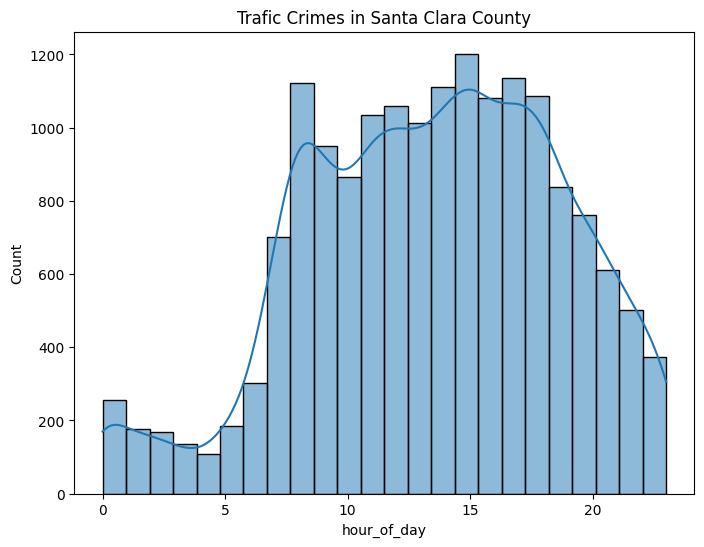

In [82]:
data=df_tf['hour_of_day']
plt.figure(figsize=(8,6))
g=sns.histplot(data,kde=True, bins=24)
g.set_title('Trafic Crimes in Santa Clara County')
plt.show()

In [22]:
most=['TF','A1', 'C', 'V2','PS', 'D2', 'O']
df_s = df.loc[~df['incident_code'].isin(most)]
df_s.shape

(24751, 24)

<Figure size 2000x1000 with 0 Axes>

Text(0.5, 1.0, 'Less Frequent Crimes in Santa Clara County')

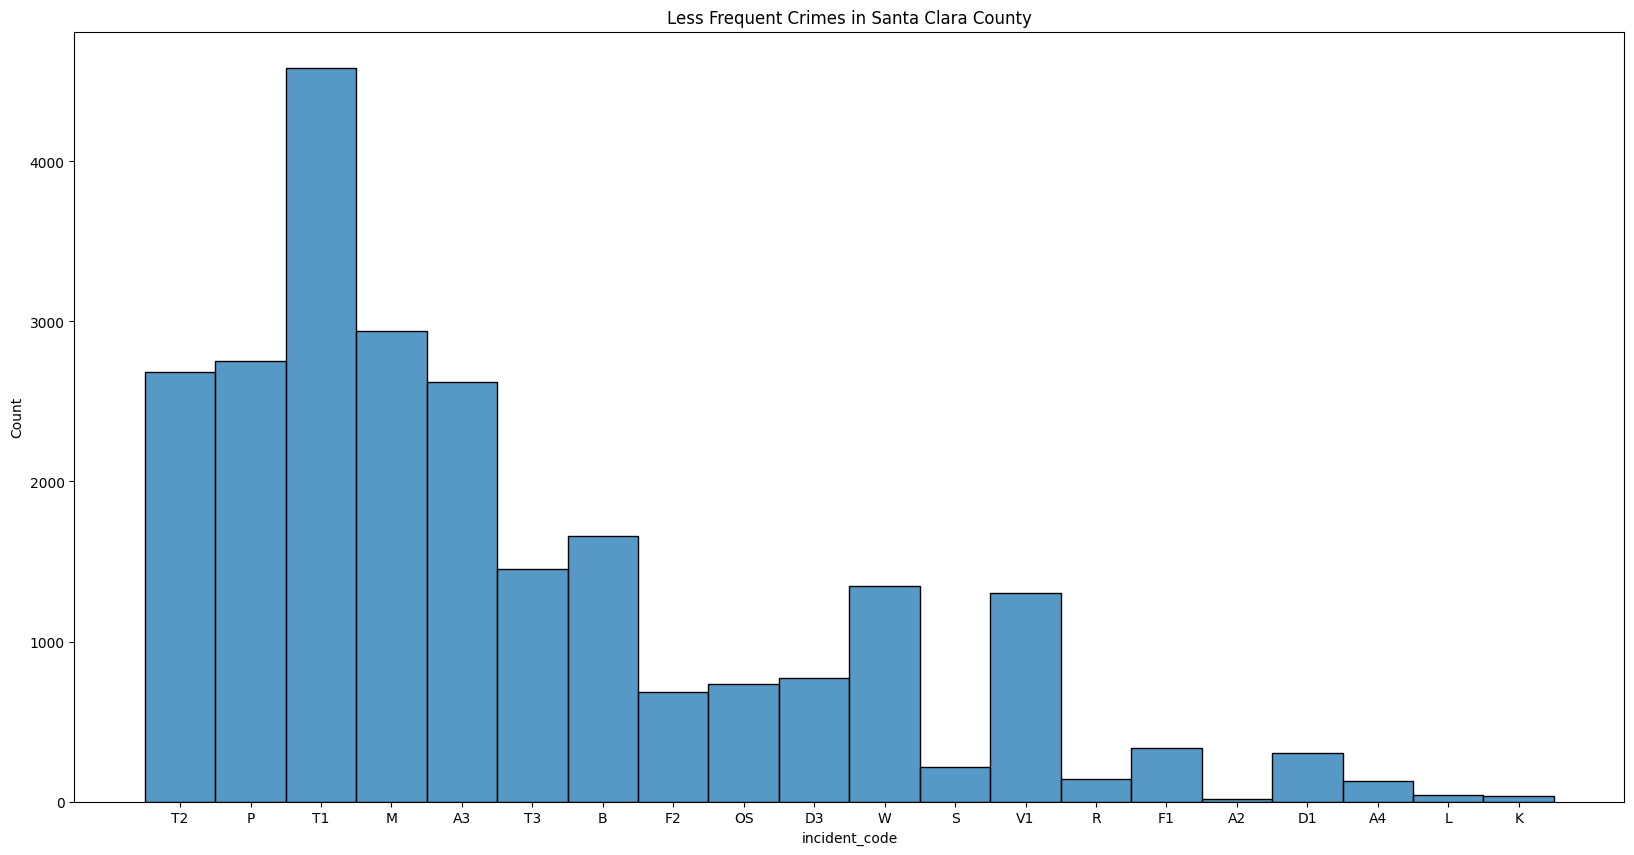

In [91]:
data=df_s['incident_code']
plt.figure(figsize=(20,10))
g=sns.histplot(data)
g.set_title('Less Frequent Crimes in Santa Clara County')
plt.show()

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Less Common Crimes in Santa Clara County')

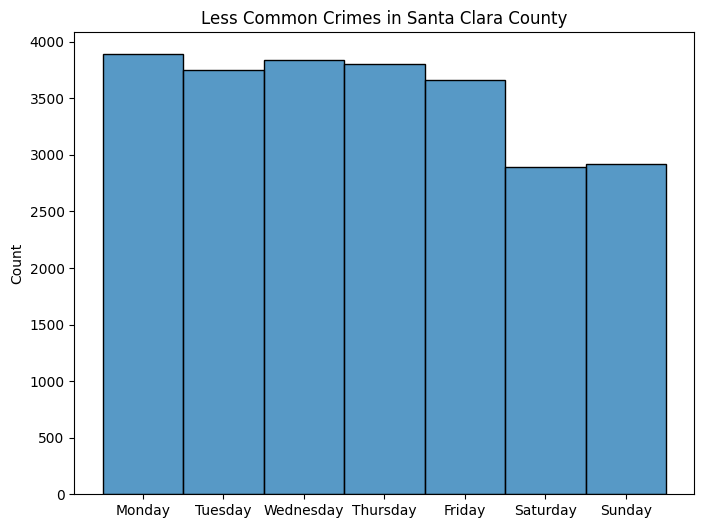

In [23]:
data=df_s['day_of_week']
data = pd.Categorical(data, categories=days_order, ordered=True)
plt.figure(figsize=(8,6))
g=sns.histplot(data)
g.set_title('Less Common Crimes in Santa Clara County')
plt.show()

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Less Common Crimes in Santa Clara County')

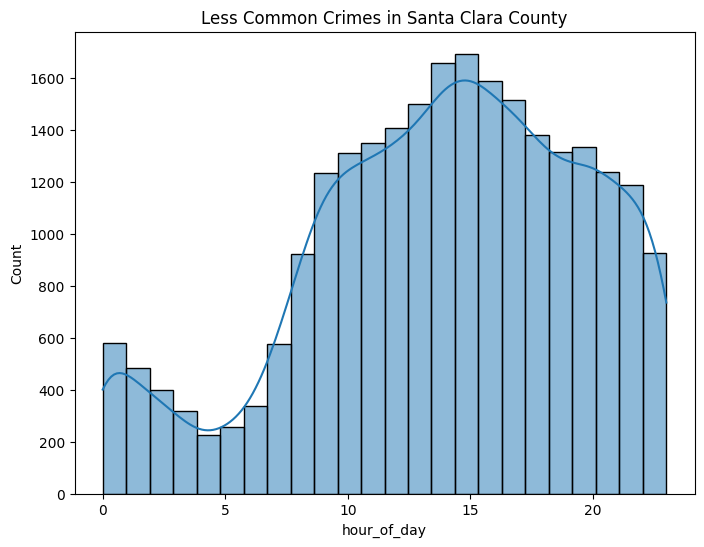

In [94]:
data=df_s['hour_of_day']
plt.figure(figsize=(8,6))
g=sns.histplot(data,kde=True, bins=24)
g.set_title('Less Common Crimes in Santa Clara County')
plt.show()

<Figure size 2000x600 with 0 Axes>

Text(0.5, 1.0, 'Less Common Crime Incidents in Santa Clara County')

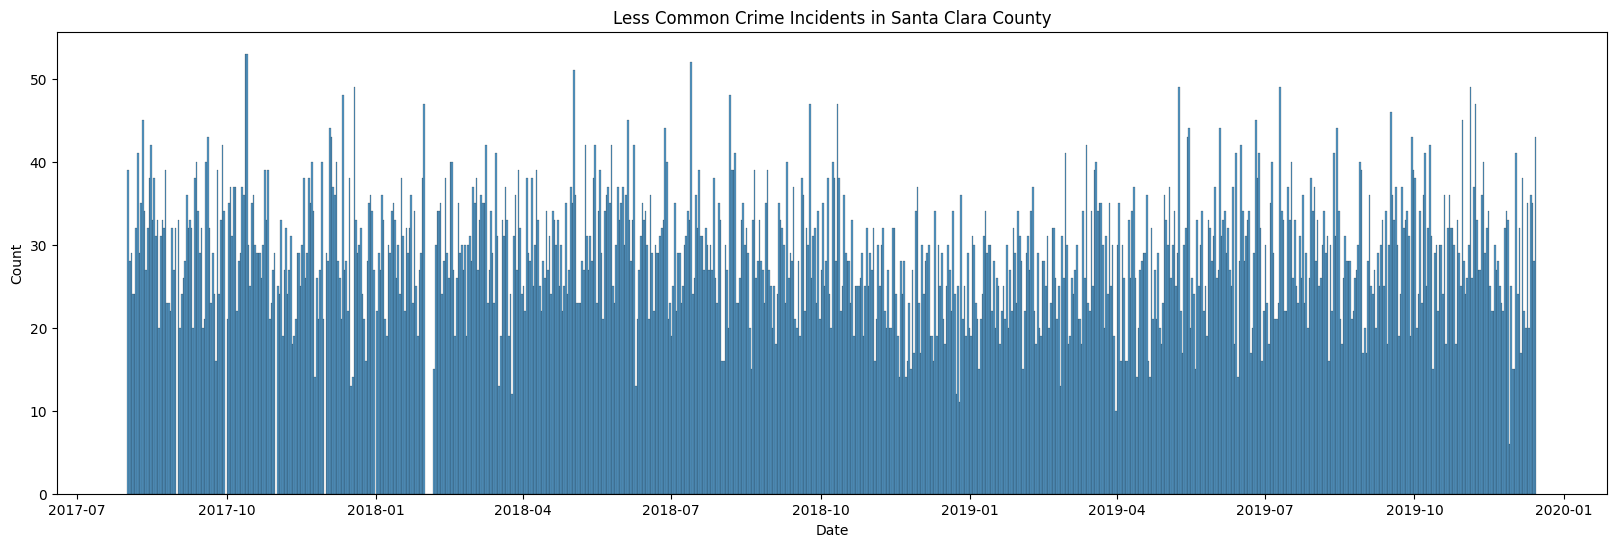

In [138]:
data=df_s['Date']
plt.figure(figsize=(20,6))
g=sns.histplot(data, bins=867)
g.set_title('Less Common Crime Incidents in Santa Clara County')
plt.show()

In [7]:
# Loading the dataset
df = pd.read_csv('santa_clara_crime_data.csv')
print(df.info())
df[:2]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194865 entries, 0 to 194864
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   incident_id            194865 non-null  int64  
 1   case_number            194865 non-null  object 
 2   incident_datetime      194865 non-null  object 
 3   incident_type_primary  194865 non-null  object 
 4   incident_description   194865 non-null  object 
 5   clearance_type         0 non-null       float64
 6   address_1              194864 non-null  object 
 7   address_2              0 non-null       float64
 8   city                   194865 non-null  object 
 9   state                  194865 non-null  object 
 10  zip                    149 non-null     float64
 11  country                0 non-null       float64
 12  latitude               194865 non-null  float64
 13  longitude              194865 non-null  float64
 14  created_at             194865 non-nu

incident_id case_number incident_datetime  incident_type_primary  \
0    834531738  S180490316   2/18/2018 21:19        PEDESTRIAN STOP   
1    834531737  S180490317   2/18/2018 21:24  UNKNOWN TYPE 911 CALL   

                                incident_description  clearance_type  \
0  Call Type: 1095   <br>Description: PEDESTRIAN ...             NaN   
1  Call Type: 911UNK <br>Description: UNKNOWN TYP...             NaN   

                  address_1  address_2                city state  zip  \
0     SARATOGA SUNNYVALE RD        NaN  SANTA CLARA COUNTY    CA  NaN   
1  100 Block BLOCK S 1ST ST        NaN  SANTA CLARA COUNTY    CA  NaN   

   country   latitude   longitude      created_at      updated_at  \
0      NaN  37.279442 -122.031355  2/19/2018 6:05  2/26/2018 2:31   
1      NaN  37.335714 -121.889062  2/19/2018 6:05  2/26/2018 2:31   

                                         location  hour_of_day day_of_week  \
0  POINT (-122.03135506612081 37.279442038259376)           21      Sunday   
1   POINT (-121.88906235618761 37.33571374139603)           21      Sunday   

  parent_incident_type  
0      Pedestrian Stop  
1                Alarm

In [10]:
from datetime import datetime
df['Daydate'] = pd.to_datetime(df['incident_datetime'])
df['Daydate'] = df['Daydate'].dt.floor('D')
print(df.info())
df[:2]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194865 entries, 0 to 194864
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   incident_id            194865 non-null  int64         
 1   case_number            194865 non-null  object        
 2   incident_datetime      194865 non-null  object        
 3   incident_type_primary  194865 non-null  object        
 4   incident_description   194865 non-null  object        
 5   clearance_type         0 non-null       float64       
 6   address_1              194864 non-null  object        
 7   address_2              0 non-null       float64       
 8   city                   194865 non-null  object        
 9   state                  194865 non-null  object        
 10  zip                    149 non-null     float64       
 11  country                0 non-null       float64       
 12  latitude               194865 non-null  floa

incident_id case_number incident_datetime  incident_type_primary  \
0    834531738  S180490316   2/18/2018 21:19        PEDESTRIAN STOP   
1    834531737  S180490317   2/18/2018 21:24  UNKNOWN TYPE 911 CALL   

                                incident_description  clearance_type  \
0  Call Type: 1095   <br>Description: PEDESTRIAN ...             NaN   
1  Call Type: 911UNK <br>Description: UNKNOWN TYP...             NaN   

                  address_1  address_2                city state  ...  \
0     SARATOGA SUNNYVALE RD        NaN  SANTA CLARA COUNTY    CA  ...   
1  100 Block BLOCK S 1ST ST        NaN  SANTA CLARA COUNTY    CA  ...   

   country   latitude   longitude      created_at      updated_at  \
0      NaN  37.279442 -122.031355  2/19/2018 6:05  2/26/2018 2:31   
1      NaN  37.335714 -121.889062  2/19/2018 6:05  2/26/2018 2:31   

                                         location hour_of_day  day_of_week  \
0  POINT (-122.03135506612081 37.279442038259376)          21       Sunday   
1   POINT (-121.88906235618761 37.33571374139603)          21       Sunday   

  parent_incident_type    Daydate  
0      Pedestrian Stop 2018-02-18  
1                Alarm 2018-02-18  

[2 rows x 21 columns]

<Figure size 2500x500 with 0 Axes>

Text(0.5, 1.0, 'Crime Incidents in Santa Clara County')

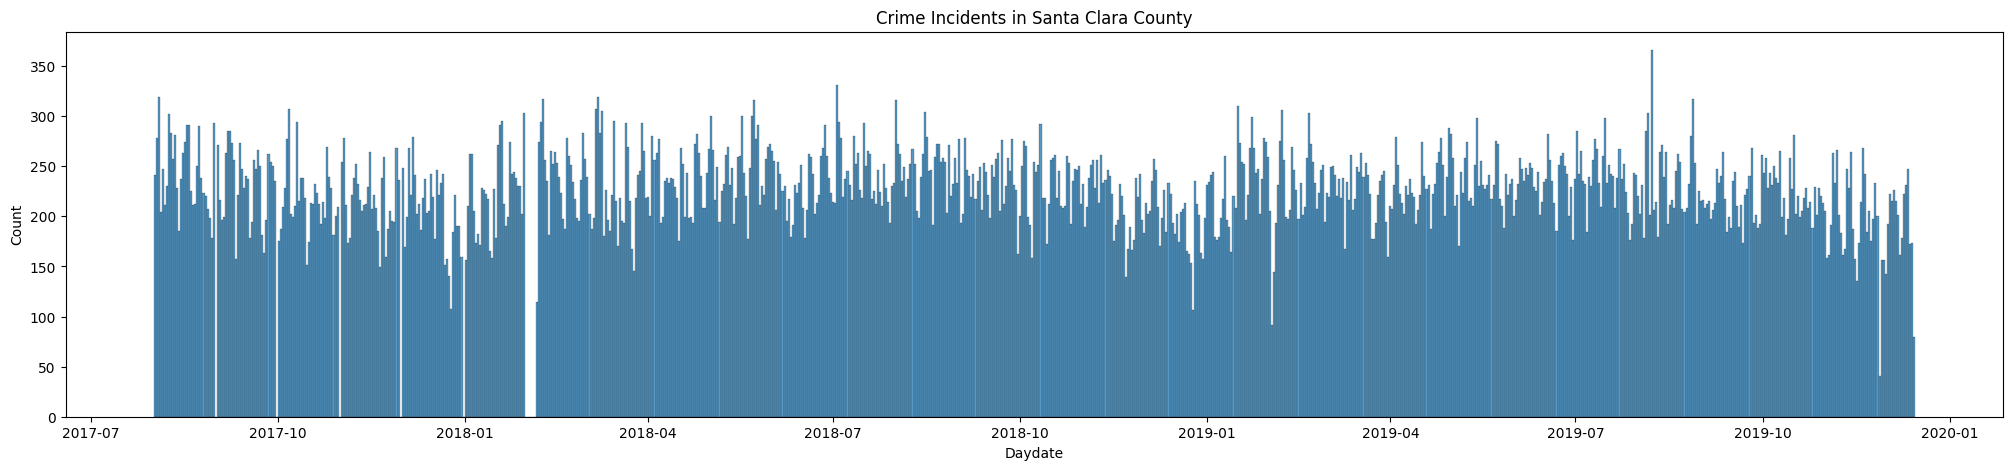

In [11]:
data=df['Daydate']
plt.figure(figsize=(25,5))
g=sns.histplot(data, bins=867)
g.set_title('Crime Incidents in Santa Clara County')
plt.show()

In [15]:
sorted_df = df.sort_values(by='Daydate')

In [196]:
# Loading the dataset
tab = pd.read_csv('crimes.csv')
print(tab.info())
tab[:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14926 entries, 0 to 14925
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     14926 non-null  int64 
 1   date           14926 non-null  object
 2   incident       14926 non-null  object
 3   count          14926 non-null  int64 
 4   incident_type  14926 non-null  object
dtypes: int64(2), object(3)
memory usage: 583.2+ KB
None


Unnamed: 0        date incident  count  \
0           1  2017-08-01       A1     20   
1           2  2017-08-02       A1     29   
2           3  2017-08-03       A1     25   
3           4  2017-08-04       A1     25   
4           5  2017-08-05       A1     33   
5           6  2017-08-06       A1     16   
6           7  2017-08-07       A1     33   
7           8  2017-08-08       A1     36   
8           9  2017-08-09       A1     26   
9          10  2017-08-10       A1     33   

                                   incident_type  
0  Common public safety crimes & traffic related  
1  Common public safety crimes & traffic related  
2  Common public safety crimes & traffic related  
3  Common public safety crimes & traffic related  
4  Common public safety crimes & traffic related  
5  Common public safety crimes & traffic related  
6  Common public safety crimes & traffic related  
7  Common public safety crimes & traffic related  
8  Common public safety crimes & traffic related  
9  Common public safety crimes & traffic related

In [208]:
from datetime import datetime
tab['Date'] = pd.to_datetime(tab['date'])
tab['Date'] = tab['Date'].dt.floor('D')
print(tab.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14926 entries, 0 to 14925
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     14926 non-null  int64         
 1   date           14926 non-null  object        
 2   incident       14926 non-null  object        
 3   count          14926 non-null  int64         
 4   incident_type  14926 non-null  object        
 5   Date           14926 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 699.8+ KB
None


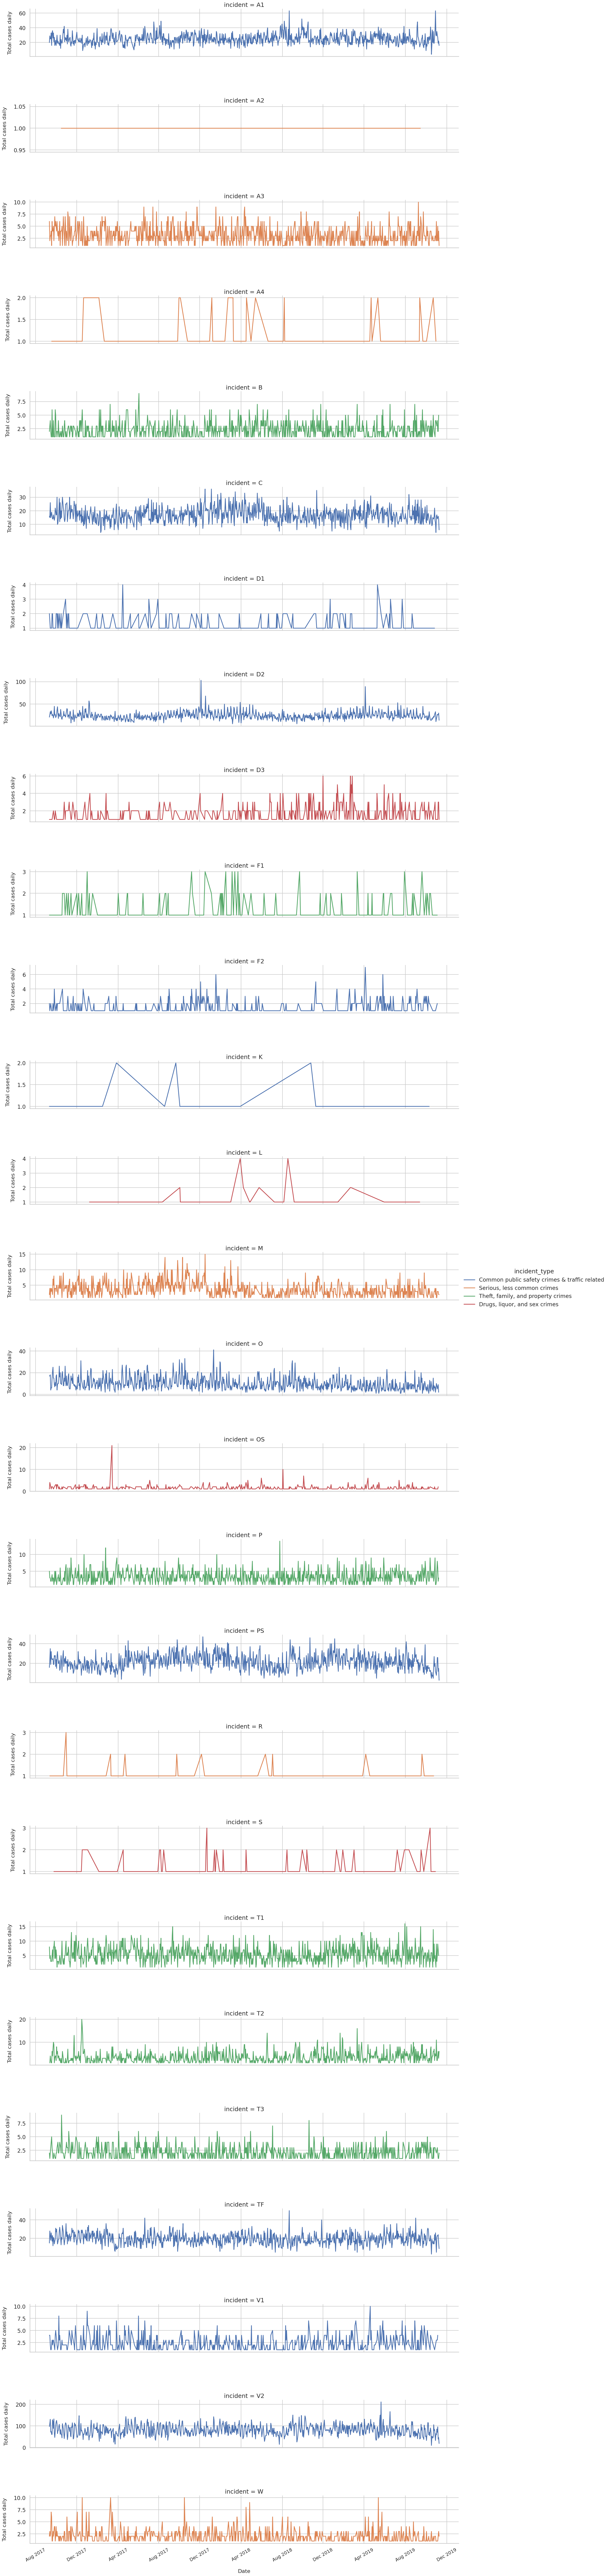

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context("talk")

CumulativeSales = sns.relplot(data=tab,
             x="Date",
             y="count",
             hue="incident_type",
             kind = 'line',
             style="incident_type",
             markers=False,
             dashes=False,
             height = 5, 
             aspect = 20/5,
             facet_kws={'sharey': False}, 
             row = "incident" 
             ) 

CumulativeSales.set_axis_labels("Date", "Total cases daily", size = 16, labelpad = 20)
CumulativeSales._legend.set_frame_on(False)  
CumulativeSales.set_xticklabels(rotation=30)
CumulativeSales.set_xticklabels(['Aug 2017', 'Dec 2017', 'Apr 2017', 'Aug 2017', 'Dec 2017', 'Apr 2018', 'Aug 2018', 'Dec 2018', 'Apr 2019', 'Aug 2019', 'Dec 2019'], size = 14)
plt.subplots_adjust(top=0.80, hspace = 1.0)
plt.show()


In [221]:
CumulativeSales.savefig('incident_types_SantaClara.jpeg')

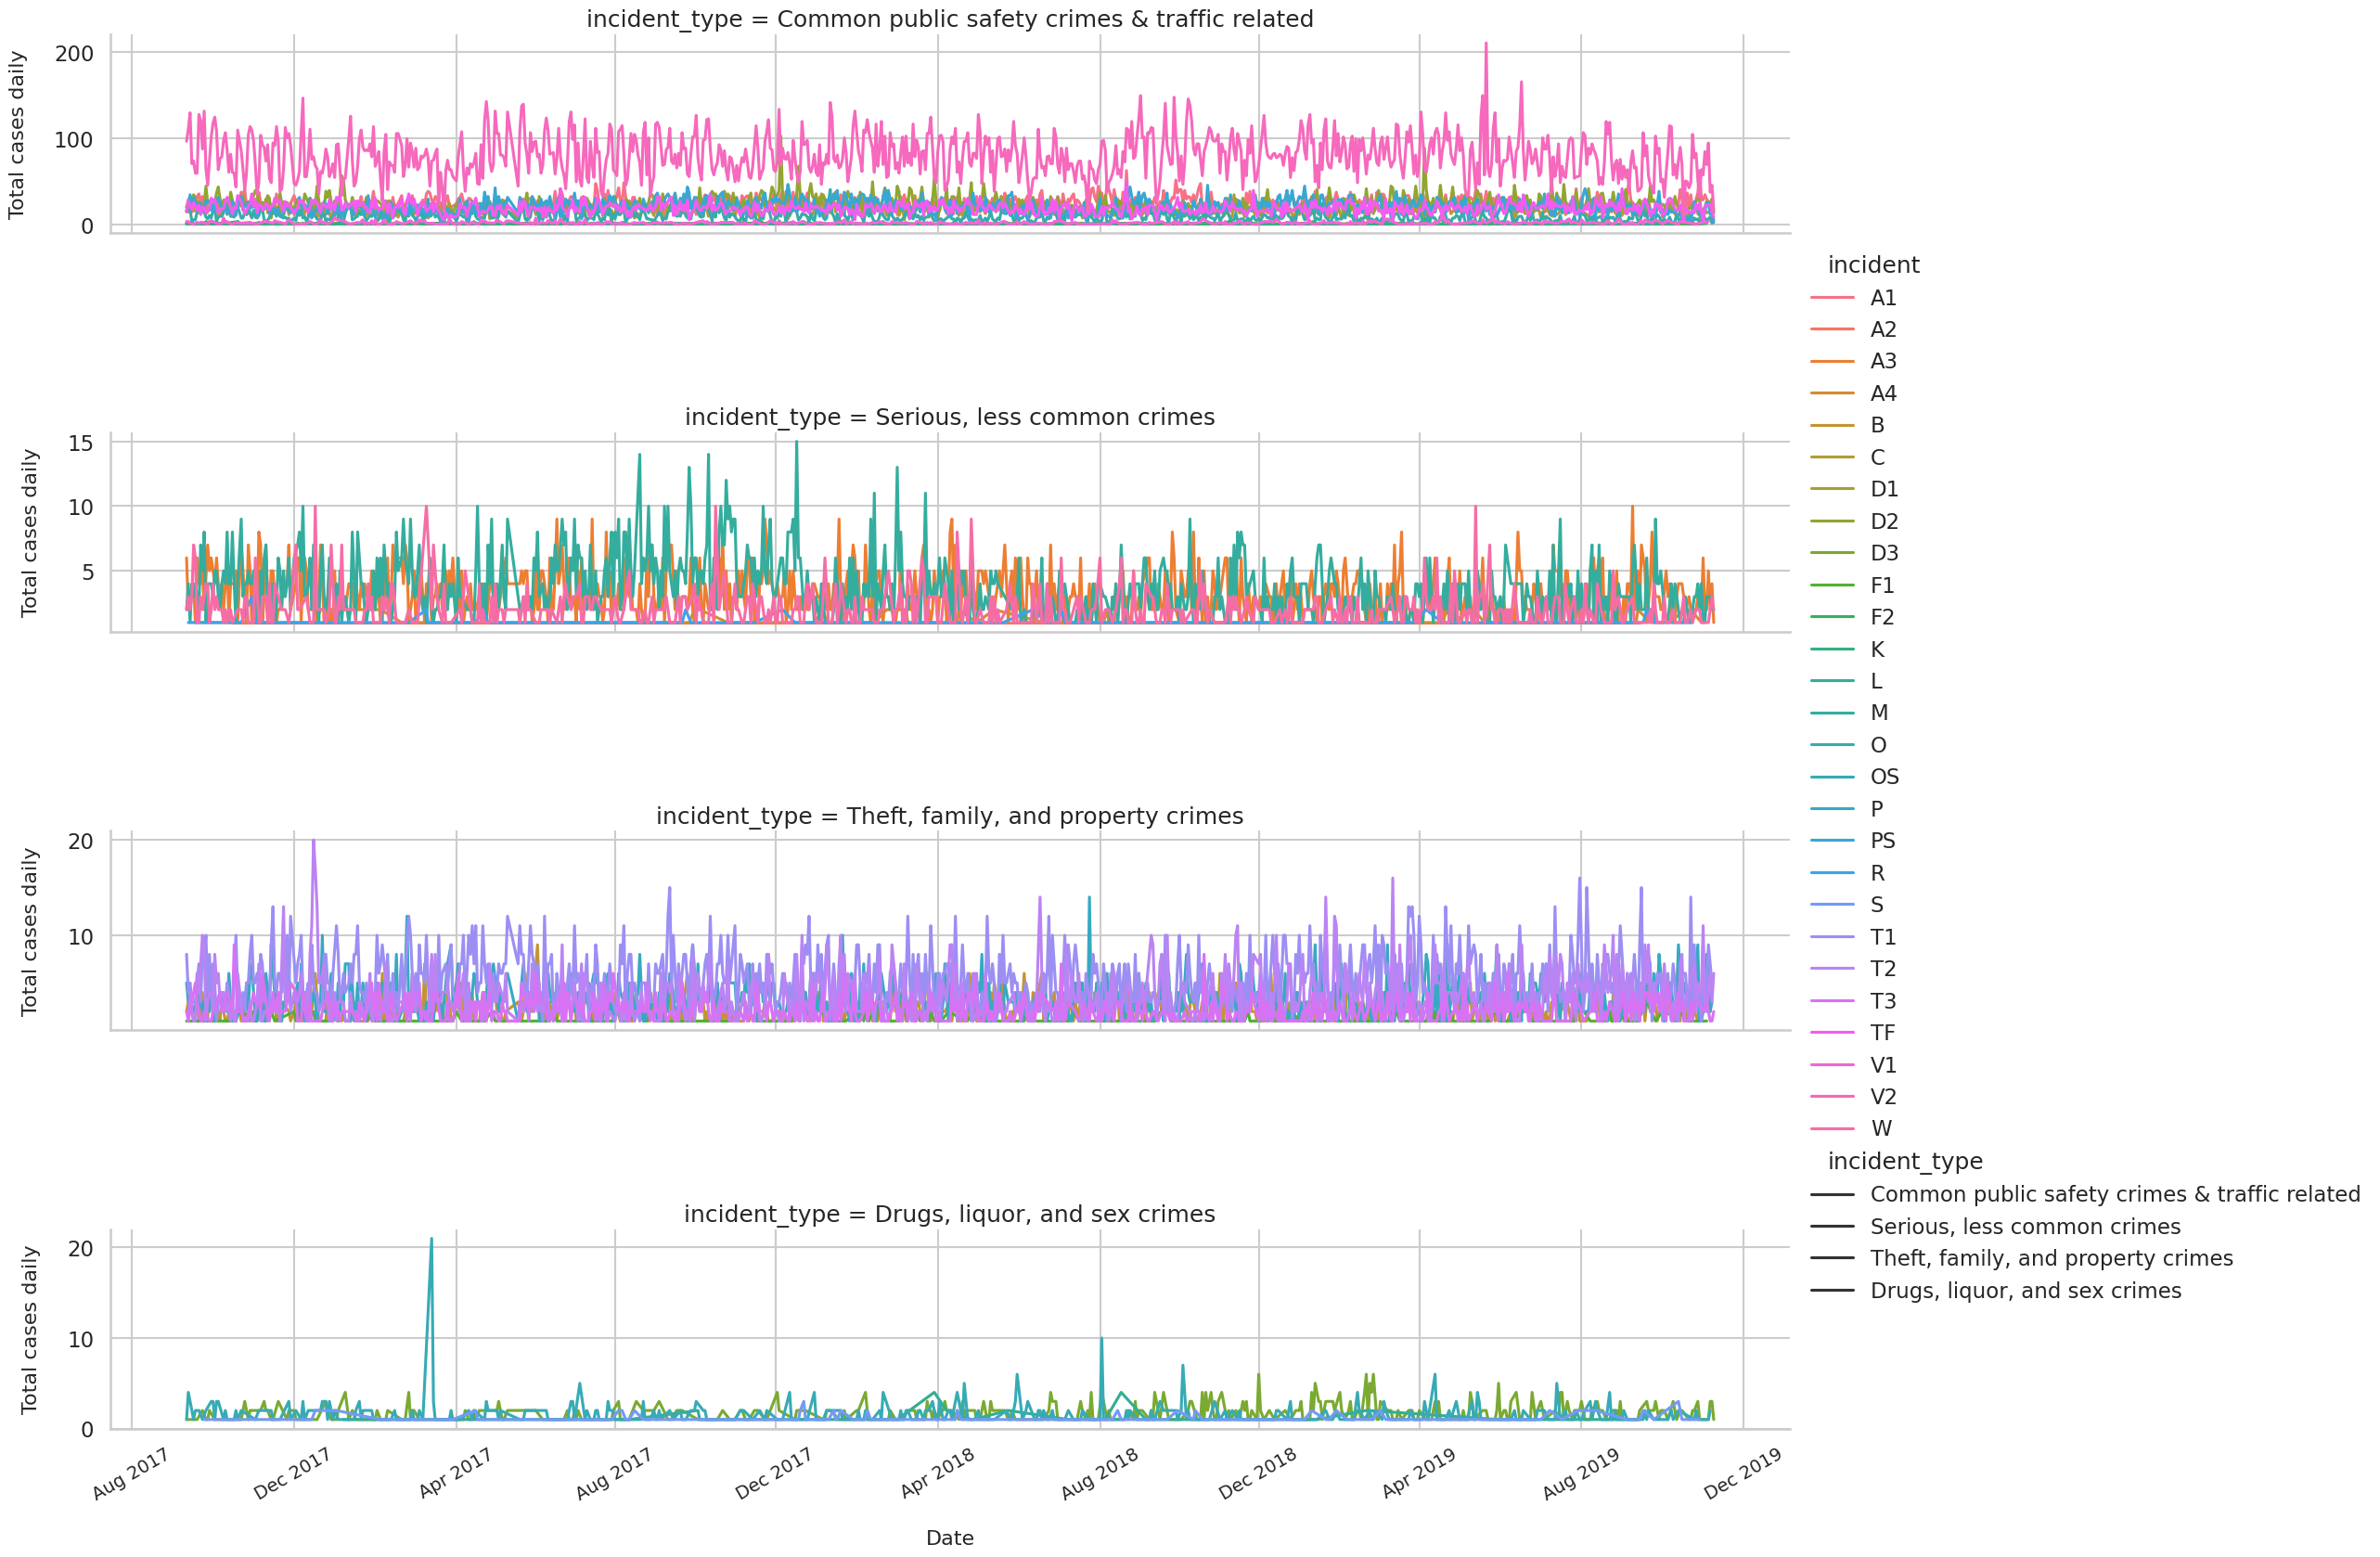

In [222]:
sns.set(style="whitegrid")
sns.set_context("talk")

crime_series = sns.relplot(data=tab,
             x="Date",
             y="count",
             hue="incident",
             kind = 'line',
             style="incident_type",
             markers=False,
             dashes=False,
             height = 5, 
             aspect = 20/5,
             facet_kws={'sharey': False}, 
             row = "incident_type" 
             ) 

crime_series.set_axis_labels("Date", "Total cases daily", size = 16, labelpad = 20)
crime_series._legend.set_frame_on(False)  
crime_series.set_xticklabels(rotation=30)
crime_series.set_xticklabels(['Aug 2017', 'Dec 2017', 'Apr 2017', 'Aug 2017', 'Dec 2017', 'Apr 2018', 'Aug 2018', 'Dec 2018', 'Apr 2019', 'Aug 2019', 'Dec 2019'], size = 14)
plt.subplots_adjust(top=0.80, hspace = 1.0)
plt.show()


In [223]:
crime_series.savefig('crimes_TS_SantaClara.jpeg')